### Import Necessary Library

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Loading the Dataset

In [75]:
airbnb = pd.read_csv('D:/Data D/Data E/My Data/Modern/My Folder/Kurikulum Pribadi/Data Science/Project/Airbnb Price Prediction/AB_NYC_2019.csv')

airbnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [76]:
airbnb.shape

(48895, 16)

In [77]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [78]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### Understanding, Wrangling and Cleaning Data

In [79]:
#Drop irrelevant column
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [80]:
#Replace NaN value in Review_per_month by 0.0
airbnb.fillna({'reviews_per_month':0}, inplace=True)

#replace Nan value in name by Not Mentioned
airbnb.fillna({'name':'Not Mentioned'}, inplace=True)

airbnb.isnull().sum()


name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Exploratory Data Analysis

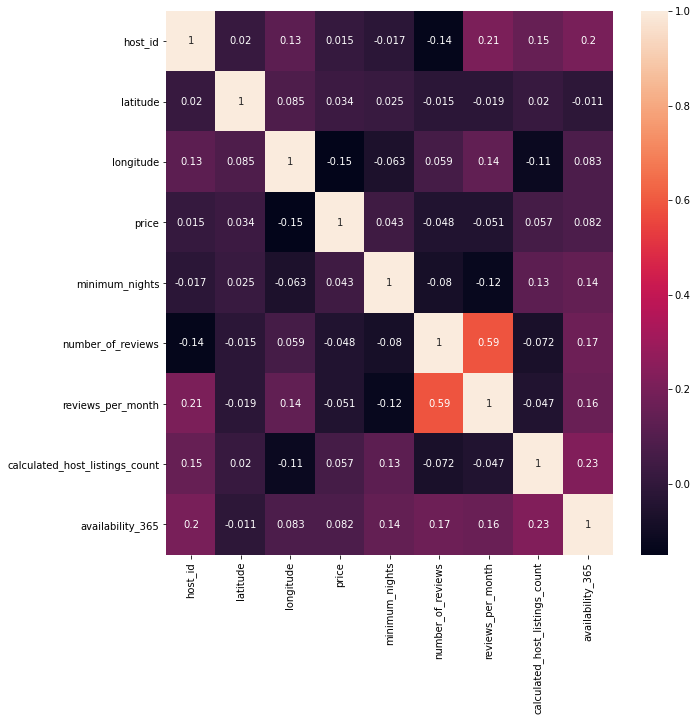

In [111]:
#Plotting correlation matrix
plt.figure(figsize = (10,10))
sns.heatmap(airbnb.corr(), annot=True)
plt.show()

### Question 1: What is the most rent neighbourhood group?

In [82]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

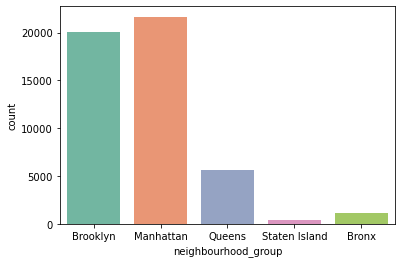

In [107]:
sns.countplot(x='neighbourhood_group', data=airbnb, palette='Set2')

### Question 2: What is the most preferred room type?

In [84]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

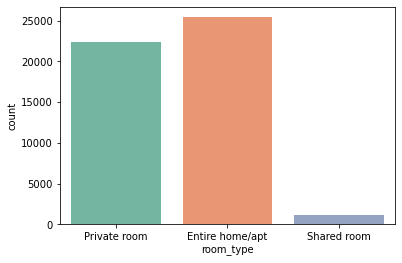

In [106]:
sns.countplot(x='room_type', data=airbnb, palette='Set2')

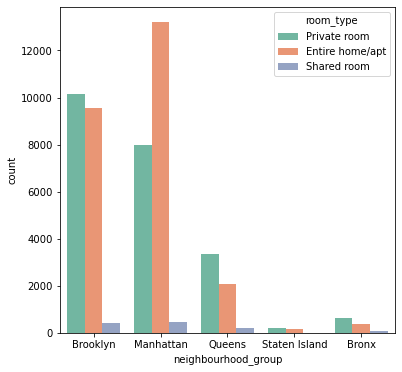

In [108]:
plt.figure(figsize=(6,6))
sns.countplot(airbnb['neighbourhood_group'], hue=airbnb['room_type'], palette='Set2')

### Question 3: How the airbnb price range?

In [87]:
#find out the range of airbnb room price
print('==Airbnb room price per night==')
print('Maximum Price in $ :', airbnb['price'].max())
print('Minimum Price in $ :', airbnb['price'].min())
print('Average Price in $ :', airbnb['price'].mean())

==Airbnb room price per night==
Maximum Price in $ : 10000
Minimum Price in $ : 0
Average Price in $ : 152.7206871868289


In [88]:
#Average price based on neighbourhood group
brooklyn = airbnb['neighbourhood_group'] == 'Brooklyn'
manhattan = airbnb['neighbourhood_group'] == 'Manhattan'
queens = airbnb['neighbourhood_group'] == 'Queens'
bronx = airbnb['neighbourhood_group'] == 'Bronx'

brooklyn_p = airbnb[brooklyn]['price'].mean()
manhattan_p = airbnb[manhattan]['price'].mean()
queens_p = airbnb[queens]['price'].mean()
bronx_p = airbnb[bronx]['price'].mean()

print('==Average room price in ($) based on neighbourhood group==')
print('Brooklyn:',brooklyn_p)
print('Manhattan:', manhattan_p)
print('Queens:', queens_p)
print('Bronx:', bronx_p)

==Average room price in ($) based on neighbourhood group==
Brooklyn: 124.38320732192598
Manhattan: 196.8758136743456
Queens: 99.51764913519237
Bronx: 87.4967919340055


In [98]:
#free rent of airbnb room
free_airbnb= (airbnb[(airbnb['price']==0)])
free_airbnb

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25433,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
25753,"Sunny, Quiet Room in Greenpoint",1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
25778,Modern apartment in the heart of Williamsburg,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25794,Spacious comfortable master bedroom with nice ...,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,Contemporary bedroom in brownstone with nice view,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,Cozy yet spacious private brownstone bedroom,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
26259,the best you can find,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0.00,1,0
26841,Coliving in Brooklyn! Modern design / Shared room,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333


In [17]:
#minimum night 
airbnb['minimum_nights'].unique()

array([   1,    3,   10,   45,    2,    5,    4,   90,    7,   14,   60,
         29,   30,  180,    9,   31,    6,   15,    8,   26,   28,  200,
         50,   17,   21,   11,   25,   13,   35,   27,   18,   20,   40,
         44,   65,   55,  120,  365,  122,   19,  240,   88,  115,  150,
        370,   16,   80,  181,  265,  300,   59,  185,  360,   56,   12,
         70,   39,   24,   32, 1000,  110,  270,   22,   75,  250,   62,
         23, 1250,  364,   74,  198,  100,  500,   43,   91,  480,   53,
         99,  160,   47,  999,  186,  366,   68,   93,   87,  183,  299,
        175,   98,  133,  354,   42,   33,   37,  225,  400,  105,  184,
        153,  134,  222,   58,  210,  275,  182,  114,   85,   36],
      dtype=int64)

### Question 4: What host has the top listings on Airbnb? 

In [18]:
#Calculated_host_listings_count
airbnb['calculated_host_listings_count'].unique()

array([  6,   2,   1,   4,   3,   5,   7,  13,  28,  11,   8,   9,  52,
        18,  15,  19,  10,  39,  26,  29,  12,  21,  96,  14,  34,  43,
       121,  37,  49,  31,  91,  16,  87,  33,  23,  50,  20,  25, 232,
        17,  47, 103,  65,  30,  27, 327,  32], dtype=int64)

In [19]:
#Finding top 10 host_id listing on Airbnb
listings = airbnb['host_id'].value_counts().head(10)
df_listings = pd.DataFrame(listings)
df_listings.reset_index(inplace=True)
df_listings.rename(columns={'index':'Host_ID', 'host_id':'Number_of_listings'}, inplace=True)
df_listings

,Host_ID,Number_of_listings
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

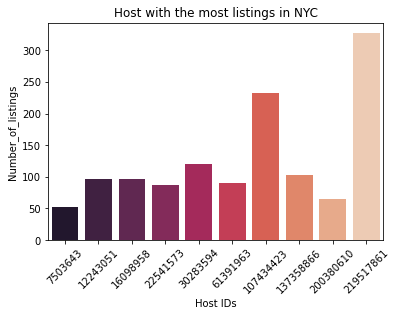

In [20]:
Bar_listings=sns.barplot(x='Host_ID', y='Number_of_listings', data=df_listings, palette='rocket')
Bar_listings.set_title('Host with the most listings in NYC')
Bar_listings.set_ylabel('Number_of_listings')
Bar_listings.set_xlabel('Host IDs')
Bar_listings.set_xticklabels(Bar_listings.get_xticklabels(), rotation=45)


### Question 5: How is the availability and price distribution based on latitude and longitude?

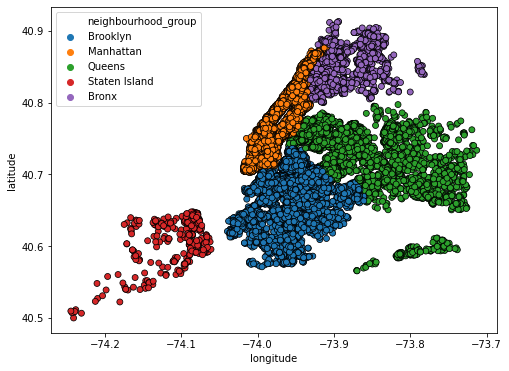

In [102]:
#neighbourhood distribution
plt.figure(figsize=(8,6))
sns.scatterplot(x= airbnb['longitude'], y=airbnb['latitude'], hue=airbnb.neighbourhood_group, edgecolor='black')

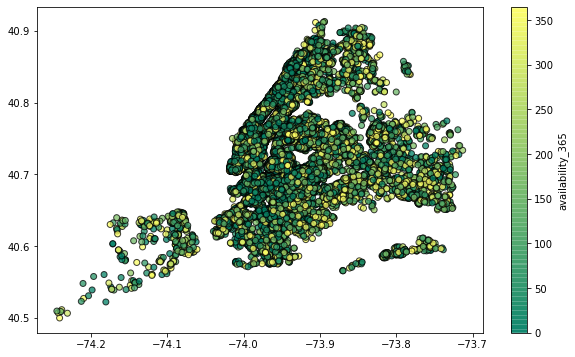

In [58]:
#availability distribution
plt.figure(figsize=(10,6))
plt.scatter(x= airbnb['longitude'], y=airbnb['latitude'], c=airbnb.availability_365, cmap='summer', edgecolor='black',alpha=0.75, linewidth=1)
cbar_a = plt.colorbar()
cbar_a.set_label('availability_365')

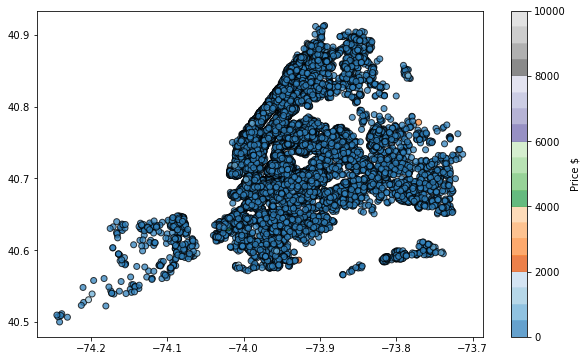

In [60]:
#price distribution
plt.figure(figsize=(10,6))
plt.scatter(x=airbnb['longitude'], y=airbnb['latitude'], c=airbnb['price'], cmap='tab20c', edgecolor='black', linewidth=1, alpha=0.75)
cbar_p=plt.colorbar()
cbar_p.set_label('Price $')